A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [264]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Tomás Ferranti
Olá, Tomás Ferranti!
Bom trabalho!


In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [276]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [277]:
q = '''CREATE TABLE IF NOT EXISTS aluno
       (id INTEGER PRIMARY KEY AUTOINCREMENT,
       nome VARCHAR(100),
       data_nascimento date,
       matricula INT)'''

cur.execute(q)

In [278]:
lista_dados=[['Tomás','2000-26-12',48192057436],['Guilherme Ferritao','1950-23-11',589023856],['Atílio','1999-25-05',45320850634]]
for k in lista_dados:
    q='INSERT INTO aluno(nome,data_nascimento,matricula) VALUES("{}","{}",{});'.format(str(k[0]),str(k[1]),k[2])
    cur.execute(q)

In [279]:
q='select * from aluno'
cur.execute(q)
for k in cur.fetchall():
    print(k)

(1, 'Tomás', '2000-26-12', 48192057436)
(2, 'Guilherme Ferritao', '1950-23-11', 589023856)
(3, 'Atílio', '1999-25-05', 45320850634)


In [280]:
conn.close()

Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [281]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [282]:
#a)
cur.execute("select count(distinct Species) from Iris")
for r in cur.fetchall():
    print(r)

(3,)


In [283]:
#b)
cur.execute("select count(Id) from Iris")
for r in cur.fetchall():
    print(r)

(150,)


In [284]:
#c)
cur.execute('SELECT max(area), Species FROM (SELECT AVG(PetalLengthCm*PetalWidthCm) as area, Species FROM iris GROUP BY Species)')
for r in cur.fetchall():
    print(r)

(11.296199999999994, 'Iris-virginica')


In [285]:
#d)
#Considerando area total como a soma das duas areas das petalas e sepalas, temos:
cur.execute('SELECT max(area), Species FROM (SELECT AVG(PetalLengthCm*PetalWidthCm+SepalLengthCm*SepalWidthCm) as area, Species FROM iris GROUP BY Species)')
for r in cur.fetchall():
    print(r)

(30.9808, 'Iris-virginica')


In [286]:
conn.close()

Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [287]:
df_votes = pd.read_excel('../../Dados/votesurvey.xls')
cols = df_votes.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
df_votes.columns = cols

In [288]:
#a)
df_votes.loc[:15]

Gender  Age  Salary_before_Stern  Expected_salary Candidate
0     Male   27                60000           110000      Bush
1     Male   30               125000           125000      Bush
2     Male   27                50000           120000      Bush
3     Male   26                56000           100000      Bush
4     Male   27                82000           100000      Bush
5     Male   32               150000           150000      Bush
6   Female   24                55000           100000      Bush
7     Male   30               110000           150000      Bush
8     Male   26                48000            80000      Bush
9     Male   26               120000            80000      Bush
10  Female   24                59000            90000      Bush
11    Male   27                65000           125000      Bush
12    Male   26                55000           120000      Bush
13    Male   28                70000           125000      Bush
14    Male   25                80000           100000      Bush
15    Male   25                45000           100000      Gore

In [289]:
#b)
presidentes=list(set(df_votes.Candidate))
for presidente in presidentes:
    print(presidente,':',sum(df_votes[df_votes.Candidate == presidente].Expected_salary)/len(df_votes[df_votes.Candidate == presidente]))

Bush : 111666.66666666667
Undecided : 103000.0
Gore : 103055.55555555556
Refuse to answer : 119500.0


In [291]:
#c)
media_homens=sum(df_votes[df_votes.Gender == "Male"].Salary_before_Stern)/len(df_votes[df_votes.Gender == "Male"])
media_mulheres=sum(df_votes[df_votes.Gender == "Female"].Salary_before_Stern)/len(df_votes[df_votes.Gender == "Female"])
idades=list(set(df_votes.Age))
idades.sort()
salariomedioidades=[]
for r in idades:
    salariomedioidades.append(sum(df_votes[df_votes.Age == r].Salary_before_Stern)/len(df_votes[df_votes.Age == r]))
print("Salário médio para homens:",media_homens)
print("Salário médio para mulheres:",media_mulheres)
for r in range(0,len(idades)):
    print("Salario médio para a idade de",idades[r],"anos:",salariomedioidades[r])
print("Considerando como fator uma diferença de acordo com a variação, temos que o sexo tem mais influência.")

Salário médio para homens: 73705.88235294117
Salário médio para mulheres: 61500.0
Salario médio para a idade de 24 anos: 57000.0
Salario médio para a idade de 25 anos: 54400.0
Salario médio para a idade de 26 anos: 74875.0
Salario médio para a idade de 27 anos: 60111.11111111111
Salario médio para a idade de 28 anos: 69166.66666666667
Salario médio para a idade de 29 anos: 79857.14285714286
Salario médio para a idade de 30 anos: 96250.0
Salario médio para a idade de 32 anos: 150000.0
Salario médio para a idade de 33 anos: 60000.0
Considerando como fator uma diferença de acordo com a variação, temos que o sexo tem mais influência.


In [292]:
#d)
df_votes["SalarioAtual/Idade"]=df_votes.Salary_before_Stern/df_votes.Age
df_votes.head()

Gender  Age  Salary_before_Stern  Expected_salary Candidate  \
0   Male   27                60000           110000      Bush   
1   Male   30               125000           125000      Bush   
2   Male   27                50000           120000      Bush   
3   Male   26                56000           100000      Bush   
4   Male   27                82000           100000      Bush   

   SalarioAtual/Idade  
0         2222.222222  
1         4166.666667  
2         1851.851852  
3         2153.846154  
4         3037.037037

Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [293]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r') as f:
    texto = f.read()
palavras = texto.split()
palavras = [p.strip(string.punctuation) for p in palavras]

In [294]:
#a)
lista=[]
palavrasjausadas=[]
for palavra in palavras:
    if palavra.startswith('A') or palavra.startswith('a'):
        if palavra not in palavrasjausadas:
            lista.append([1,palavra])
            palavrasjausadas.append(palavra)
        else:
            lista[palavrasjausadas.index(palavra)][0]+=1
lista.sort(reverse=True)
print(lista[0:10])

[[2315, 'a'], [498, 'as'], [329, 'ao'], [248, 'A'], [129, 'ainda'], [120, 'assim'], [118, 'agora'], [97, 'até'], [85, 'aos'], [80, 'aqui']]


In [295]:
#b)
palavrasjausadas=[]
quantidade=0
for palavra in palavras:
    if palavra.istitle():
        if palavra not in palavrasjausadas:
            palavrasjausadas.append(palavra)
            quantidade+=1
print(quantidade)

1251


In [296]:
#c
vogais=['A','E','I','O','U','a','e','i','o','u']
umavogal=0
duasvogais=0
tresvogais=0
for palavra in palavras:
    palavraorig=palavra
    palavra=list(palavra)
    quantidadevogais=0
    for vogal in vogais:
        while vogal in palavra:
            palavra.remove(vogal)
            quantidadevogais+=1
    if quantidadevogais==1:
        umavogal+=1
    elif quantidadevogais==2:
        duasvogais+=1
    elif quantidadevogais==3:
        tresvogais+=1
print('''
Uma vogal: {}
Duas vogais: {} 
Tres vogais: {}
'''.format(umavogal,duasvogais,tresvogais))


Uma vogal: 23037
Duas vogais: 22397 
Tres vogais: 12716



Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [297]:
#a)
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep "[aA]$" | sort | uniq -c | sort -gr | head

   2742 a
    625 da
    532 para
    468 era
    398 uma
    312 minha
    309 na
    257 A
    177 ella
    170 casa
sort: write failed: 'standard output': Broken pipe
sort: write error


In [500]:
#b)
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '*[a-z]' | sort | uniq | wc -l

9750


In [301]:
#c)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq


]
a
A
acaba
saiba
amba
emba
barba
Corityba
ca
fraca
casaca
sobrecasaca
ressaca
pataca
vacca
secca
bocca
rabeca
Bibliotheca
boneca
dedica
fatidica
indica
fica
Fica
significa
gratifica
scientifica
justifica
logica
seraphica
philosophica
encyclica
catholica
Catholica
plica
treplica
explica
Explica
polemica
astronomica
Monica
unica
communica
rica
America
Rhetorica
tisica
musica
physica
metaphysica
dramatica
pratica
prophetica
arithmetica
poetica
politica
critica
identica
botica
ecclesiastica
fantastica
mystica
therapeutica
banca
creanca
branca
franca
nunca
Nunca
boca
troca
toca
voca
Voca
evoca
equivoca
cerca
perca
forca
casca
fresca
risca
marisca
tosca
educa
Manduca
Tijuca
maluca
nuca
pouca
touca
da
Da
DA
ada
acabada
abobada
cada
Cada
achacada
complicada
pancada
cincada
cocada
cercada
escada
dada
assobradada
mandada
prendada
guardada
mudada
lisongeada
creada
fada
almofada
socegada
chegada
obrigada
castigada
zangada
engasgada
madrugada
trabalhada
palhada
atrapalhada
enxovalhada
embrulhada


accresce
produce
de
De
DE
edade
sociedade
piedade
solidariedade
propriedade
idade
vaidade
cidade
Cidade
capacidade
veracidade
felicidade
cumplicidade
mocidade
velleidade
realidade
formalidade
banalidade
naturalidade
totalidade
qualidade
casualidade
espiritualidade
rivalidade
fidelidade
infidelidade
debilidade
possibilidade
volubilidade
facilidade
docilidade
utilidade
tranquillidade
incredulidade
intimidade
Intimidade
enfermidade
ancianidade
serenidade
dignidade
infinidade
interinidade
paternidade
eternidade
opportunidade
caridade
familiaridade
integridade
Maioridade
autoridade
intensidade
curiosidade
generosidade
universidade
necessidade
Santidade
quantidade
honestidade
assiduidade
antiguidade
ingenuidade
continuidade
iniquidade
gravidade
brevidade
novidade
deslealdade
faculdade
difficuldade
divindade
bondade
Bondade
liberdade
verdade
Verdade
saudade
hade
made
frade
agrade
metade
vontade
Vontade
Majestade
amizade
Obede
cede
succede
pede
impede
hospede
parede
abide
typhoide
outside
cuid

Casmurro
CASMURRO
sussurro
tro
theatro
quatro
Quatro
feretro
entro
centro
dentro
Dentro
desencontro
potro
stro
maestro
ministro
mostro
claustro
outro
Outro
obscuro
escuro
duro
maduro
seguro
juro
Juro
muro
ouro
couro
suadouro
lavadouro
agouro
mouro
puro
futuro
livro
so
caso
Caso
acaso
Acaso
desaso
peso
preso
Preso
preciso
Preciso
liso
riso
sorriso
siso
aviso
also
falso
excelso
bolso
pulso
impulso
expulso
convulso
manso
penso
Penso
dispenso
intenso
oso
edoso
caridoso
ruidoso
duvidoso
goso
cioso
gracioso
delicioso
ancioso
receioso
religioso
copioso
mysterioso
curioso
obsequioso
cauteloso
zeloso
meticuloso
guloso
mimoso
criminoso
pomposo
vagaroso
Medroso
poderoso
mentiroso
leproso
Geitoso
verso
adverso
diverso
universo
inverso
perverso
dorso
remorso
curso
recurso
discurso
escasso
passo
excesso
confesso
regresso
travesso
isso
Isso
disso
submisso
compromisso
nisso
nosso
Nosso
posso
Posso
grosso
vosso
russo
tusso
uso
Uso
applauso
abuso
diffuso
confuso
repouso
intruso
desuso
to
To
TO
gato
gaia

Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [439]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()
invoices=pd.read_sql("select invoiceId,customerId from invoices",conn)
invoice_items=pd.read_sql("select InvoiceId,TrackId from invoice_items",conn)
customers=pd.read_sql("select customerId,FirstName,LastName from customers",conn)
tracks=pd.read_sql("select TrackId,name from tracks",conn)

In [498]:
#a)
k=[]
for r in invoice_items.TrackId:
    k.append(tracks.iloc[r-1,1])
k=np.array(k)
invoice_items["TrackName"]=k
k=[]
for r in invoices.CustomerId:
    k.append(str(customers.iloc[r-1,1])+' '+str(customers.iloc[r-1,2]))
k=np.array(k)
invoices["customerName"]=k
invoices.sort_values(by=['InvoiceId'])
k=[]
for r in invoice_items.InvoiceId:
    if r in range(0,len(invoices)):
        k.append(invoices.iloc[r-1,2])
    else:
        k.append("")
invoice_items["customerName"]=k
resposta=pd.DataFrame(invoice_items[invoice_items.customerName != "NaN" ])
resposta=resposta.iloc[:,2:]
resposta.head()

TrackName    customerName
0      Balls to the Wall  Luís Gonçalves
1      Restless and Wild  Luís Gonçalves
2  Put The Finger On You  Luís Gonçalves
3       Inject The Venom  Luís Gonçalves
4             Evil Walks  Luís Gonçalves

([<matplotlib.axis.XTick at 0x7f4ab88c44a8>,
 <a list of 4 Text xticklabel objects>)

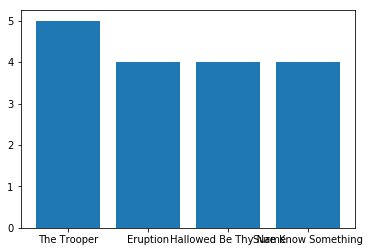

In [493]:
#b)
cur.execute('''SELECT SUM(invoice_items.quantity) as p, tracks.name FROM invoice_items 
            INNER JOIN tracks ON invoice_items.trackID = tracks.trackID 
            GROUP BY tracks.name ORDER BY p DESC''')
lista_mus = list(cur.fetchall())
lista_mus = lista_mus[0:4]
x=[]
y=[]
for r in lista_mus:
    a,b=r
    y.append(a)
    x.append(b)
xval=np.array(x)
yval=np.array(y)
x = np.arange(4)
plt.bar(x, height= yval)
plt.xticks(x,xval)

In [305]:
#c)
q='''
select artists.Name, albums.Title from albums
join tracks on tracks.AlbumId=albums.AlbumId
join artists on albums.ArtistId=artists.ArtistId
group by albums.Title
'''
cur.execute(q)
dicionario={}
k=True
#compositor,tituloalbum
for r in cur.fetchall():
    a,b=r    
    if a in dicionario:
        dicionario[a].append(b)
    else:
        dicionario[a]=[b]
print(dicionario['Iron Maiden'])
#<3 Rock in Rio Iron Maiden Melhor album

['A Matter of Life and Death', 'A Real Dead One', 'A Real Live One', 'Brave New World', 'Dance Of Death', 'Fear Of The Dark', 'Iron Maiden', 'Killers', 'Live After Death', 'Live At Donington 1992 (Disc 1)', 'Live At Donington 1992 (Disc 2)', 'No Prayer For The Dying', 'Piece Of Mind', 'Powerslave', 'Rock In Rio [CD1]', 'Rock In Rio [CD2]', 'Seventh Son of a Seventh Son', 'Somewhere in Time', 'The Number of The Beast', 'The X Factor', 'Virtual XI']


In [307]:
conn.close()

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

    Tive um aproveitamento bom. Consegui aprender novos tipos de linguagem, como Python, Unix e MySql(Junto com o SQLite), mesmo que seja momentâneo e eu esqueça no futuro, é sempre bom treinar lógica de programação. 
    Sobre a disciplina, eu queria que tivesse tido mais exemplos explicados e fornecidos para nós no momento da aula, com intuito de fixar a matéria. Todavia, o que se tinha dúvida, dava para tirar com os notebooks bem explicados.

Valor: 0,99 (Só para nao dizer que coloquei valor máximo em todas as autoavaliações).